<a href="https://colab.research.google.com/github/guilhsantos/Churn_Prevision_Streaming/blob/main/Churn_Prediction_Streaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando Bibliotecas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

Carregando Base de Dados

In [ ]:
from google.colab import files
upload = files.upload()

Saving streaming_data.csv to streaming_data.csv


# Etapa 01 - Análise exploratória dos dados (Data Understanding)

In [ ]:
df = pd.read_csv("streaming_data.csv")
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


Descrição dos Dados

In [ ]:
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


Verificação dos tipos de dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


Verificação da quantidade de faltantes

In [ ]:
df.isna().sum()

,0
Age,11277
Gender,14516
Time_on_platform,21420
Devices_connected,25188
Subscription_type,25221
Num_streaming_services,68312
Num_active_profiles,0
Avg_rating,17270
Churned,16736
User_id,0


# Etapa 02 - Tratamento dos Dados (Data Preparation)


Substituindo os Valores Nan por 0 nas colunas (Time_on_platform,
Num_streaming_services, Churned, Avg_rating, Devices_connected)


In [ ]:
colunas_Nan = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']
df[colunas_Nan] = df[colunas_Nan].fillna(0)


Dropar Linhas Nulas das colunas(Gender, Subscription_type e Age)


In [ ]:
df = df.dropna(subset=['Gender', 'Subscription_type', 'Age'])

Transformando valores 'Churned' de 0 e 1 para 'No' e 'Yes'

In [ ]:
df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})

Tranformando valores float em valores inteiros

In [ ]:
df = df.astype({'Age': 'int',	'Time_on_platform': 'int', 'Devices_connected': 'int', 'Num_streaming_services': 'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  int64  
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  int64  
 3   Devices_connected       36515 non-null  int64  
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  int64  
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  object 
 9   User_id                 36515 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 3.1+ MB


# Etapa 03 - Modelagem dos Dados - Regressão Logística

Definindo Variáveis X e y para o modelo

In [ ]:
X = df.drop(columns=['Churned', 'User_id'], axis=1)
y = df['Churned']

X = pd.get_dummies(X, drop_first=True)

Separando em train e test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Realizando o .fit do modelo

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Realizando Modelagem

In [ ]:
y_pred = model_lr.predict(X_test)

Matriz Confusão

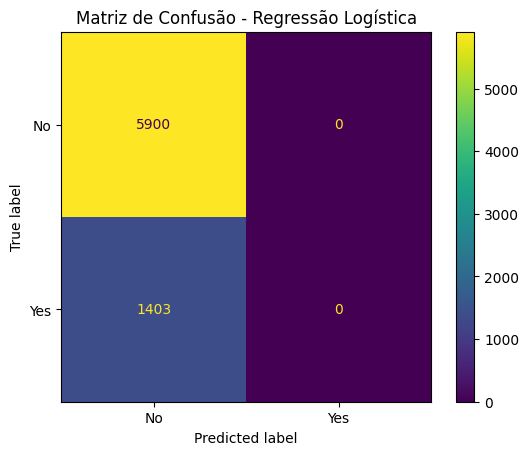

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm_lr, display_labels=model_lr.classes_).plot()
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

Printando Métricas

In [ ]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          No       0.81      1.00      0.89      5900
         Yes       0.00      0.00      0.00      1403

    accuracy                           0.81      7303
   macro avg       0.40      0.50      0.45      7303
weighted avg       0.65      0.81      0.72      7303



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Etapa 04 - Modelagem dos Dados - Random Forest

Criando o Modelo de Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

Realizando o fit do modelo

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Fazendo previsões

In [ ]:
y_pred_rf = rf_model.predict(X_test)

Matriz Confusão

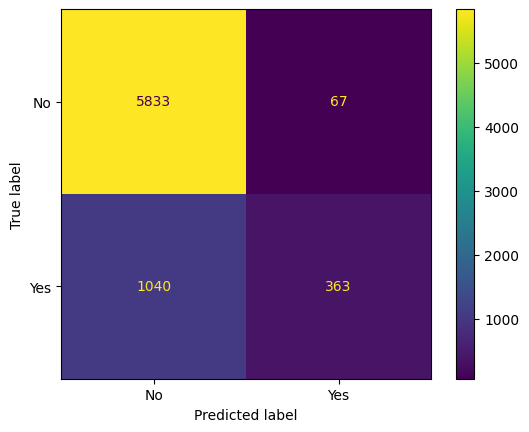

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot()

Printando Métricas

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          No       0.85      0.99      0.91      5900
         Yes       0.84      0.26      0.40      1403

    accuracy                           0.85      7303
   macro avg       0.85      0.62      0.65      7303
weighted avg       0.85      0.85      0.81      7303



# Etapa 05 - Tunning - Regressão Logística

Definindo os Hiperparâmetros para Tuning

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parâmetro de regularização
    'penalty': ['l1', 'l2'],        # Tipo de penalização
    'solver': ['liblinear']         # Solver adequado para penalização L1
}

Configurando o Grid Search

In [ ]:
grid_search_logistic = GridSearchCV(estimator=LogisticRegression(random_state=42),
                                     param_grid=param_grid,
                                     scoring='accuracy',
                                     cv=5,
                                     verbose=1,
                                     n_jobs=-1)

Realizando o fit do Modelo

In [ ]:
grid_search_logistic.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

Melhor Estimador e Hiperparâmetros

In [ ]:
best_logistic_estimator = grid_search_logistic.best_estimator_
print("Melhores hiperparâmetros da Regressão Logística:", grid_search_logistic.best_params_)

Melhores hiperparâmetros da Regressão Logística: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


Fazendo Previsões

In [ ]:
y_pred_logistic = best_logistic_estimator.predict(X_test)

Matriz de confusão

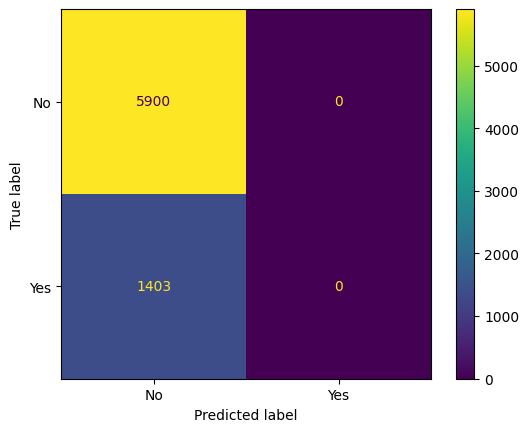

In [ ]:
cm_best_lr = confusion_matrix(y_test, y_pred_logistic)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_best_lr, display_labels=best_logistic_estimator.classes_)
disp_logistic.plot()

Printando métricas

In [ ]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

          No       0.81      1.00      0.89      5900
         Yes       0.00      0.00      0.00      1403

    accuracy                           0.81      7303
   macro avg       0.40      0.50      0.45      7303
weighted avg       0.65      0.81      0.72      7303



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Etapa 05 - Tunning - Random Forest

Realizando montagem do grid search


In [ ]:
# Definindo os parâmetros para o grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Criar o classificador
rf = RandomForestClassifier()

# Configurando o Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

Realizando o .fit do modelo

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             verbose=2)

Realizando o Tunning

In [ ]:
best_rf = grid_search.best_estimator_

Realizando a modelagem

In [ ]:
y_pred_rf = best_rf.predict(X_test)

Plotando matriz de confusão

In [ ]:
cm_best_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_best_rf, display_labels=best_rf.classes_).plot()
plt.title('Matriz de Confusão - Random Forest')
plt.show()

Printando métricas

In [ ]:
print(classification_report(y_test, y_pred_rf))